<a href="https://www.kaggle.com/code/marianafernndezgarca/who-suicide-basic-eda?scriptVersionId=107663438" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-suicide-statistics/who_suicide_statistics.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/who-suicide-statistics/who_suicide_statistics.csv")

**First, we inspect the dataset.**

In [4]:
df

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


**Let's go further.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


**We drop null values.**

In [6]:
df = df.dropna()
df

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0


**Let's group the years in decades.**

In [7]:
df["decade"] = df["year"]//10*10
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,year,sex,age,suicides_no,population,decade
24,Albania,1987,female,15-24 years,14.0,289700.0,1980
25,Albania,1987,female,25-34 years,4.0,257200.0,1980
26,Albania,1987,female,35-54 years,6.0,278800.0,1980
27,Albania,1987,female,5-14 years,0.0,311000.0,1980
28,Albania,1987,female,55-74 years,0.0,144600.0,1980
...,...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0,2010
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0,2010
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0,2010
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0,2010


**Let's find out the suicide rate.**

In [8]:
df["rate"] = df["suicides_no"]/df["population"]*100
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,year,sex,age,suicides_no,population,decade,rate
24,Albania,1987,female,15-24 years,14.0,289700.0,1980,0.004833
25,Albania,1987,female,25-34 years,4.0,257200.0,1980,0.001555
26,Albania,1987,female,35-54 years,6.0,278800.0,1980,0.002152
27,Albania,1987,female,5-14 years,0.0,311000.0,1980,0.000000
28,Albania,1987,female,55-74 years,0.0,144600.0,1980,0.000000
...,...,...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0,2010,0.043393
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0,2010,0.007990
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0,2010,0.000000
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0,2010,0.000000


**Now let's graph the top 10 suicide rate.**

In [9]:
suicide_rate = df.pivot_table(index=["country"], 
                               aggfunc={"rate":sum}).sort_values("rate", ascending=False).iloc[0:10:1]
suicide_rate

,rate
country,
Hungary,18.091923
Lithuania,15.830761
Russian Federation,14.363738
Latvia,14.031309
Estonia,12.128748
Kazakhstan,11.966755
Slovenia,11.537060
Austria,11.000488
Ukraine,10.234628


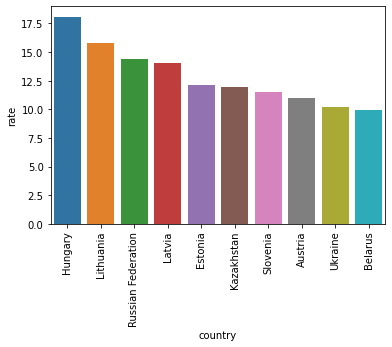

In [10]:
sns.barplot(x=suicide_rate.index, y=suicide_rate["rate"])
plt.xticks(rotation=90)
plt.show()

**Now let's see the evolution of total suicides through decades.**

In [11]:
s_t_decades = df.groupby("decade").sum("suicides_no")
s_t_decades

,year,suicides_no,population,rate
decade,,,,
1970,854928,92790.0,8.225891e+08,5.292984
1980,15100416,1697608.0,1.230829e+10,109.783357
1990,19101120,2344775.0,1.641731e+10,144.584889
2000,23380704,2470449.0,1.925506e+10,143.097213
2010,13644444,1392845.0,1.249859e+10,72.696037


**And now we graph it.**

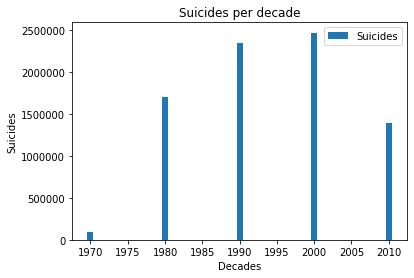

In [12]:
plt.bar(s_t_decades.index, s_t_decades["suicides_no"].values, label="Suicides")
plt.title("Suicides per decade")
plt.xlabel("Decades")
plt.ylabel("Suicides")
plt.legend()
plt.ticklabel_format(style= "plain")
plt.show()

**Let's order the age groups.**

In [13]:
df["age_group"] = df["age"].map({
    "5-14 years": "1: 5-14 years ",
    "15-24 years": "2: 15-24 years",
    "25-34 years": "3: 25-34 years",
    "35-54 years": "4: 35-54 years",
    "55-74 years": "5: 55-74 years",
    "75+ years": "6: 75+ years"
})
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,country,year,sex,age,suicides_no,population,decade,rate,age_group
24,Albania,1987,female,15-24 years,14.0,289700.0,1980,0.004833,2: 15-24 years
25,Albania,1987,female,25-34 years,4.0,257200.0,1980,0.001555,3: 25-34 years
26,Albania,1987,female,35-54 years,6.0,278800.0,1980,0.002152,4: 35-54 years
27,Albania,1987,female,5-14 years,0.0,311000.0,1980,0.000000,1: 5-14 years
28,Albania,1987,female,55-74 years,0.0,144600.0,1980,0.000000,5: 55-74 years
...,...,...,...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0,2010,0.043393,3: 25-34 years
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0,2010,0.007990,4: 35-54 years
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0,2010,0.000000,1: 5-14 years
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0,2010,0.000000,5: 55-74 years


**We plot suicides by age group.**

In [14]:
suicides_per_ages = df.pivot_table(index=["age_group"],
                               aggfunc={"suicides_no":sum})
suicides_per_ages

,suicides_no
age_group,
1: 5-14 years,62320.0
2: 15-24 years,975700.0
3: 25-34 years,1360780.0
4: 35-54 years,2887740.0
5: 55-74 years,1955150.0
6: 75+ years,756777.0


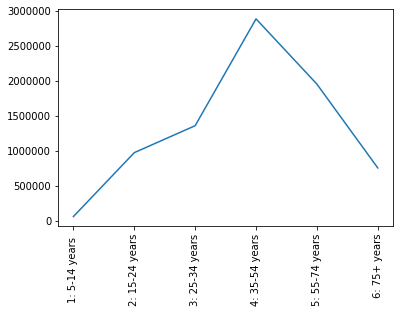

In [15]:
fig, ax = plt.subplots()
plt.plot(suicides_per_ages.index, suicides_per_ages["suicides_no"].values)
plt.xticks(rotation=90)
ax.ticklabel_format(useOffset=False, style='plain', axis="y")
plt.show()

**Let's find out which are the 10 countries with the highest number of suicides.**

In [16]:
top_10_s_country = df.pivot_table(index=["country"],
                               aggfunc={"suicides_no":sum}).sort_values("suicides_no", ascending=False).iloc[0:10:1]
top_10_s_country

,suicides_no
country,
Russian Federation,1500992.0
United States of America,1201401.0
Japan,937614.0
France,395500.0
Ukraine,365170.0
Germany,291262.0
Republic of Korea,261730.0
Brazil,250824.0
Poland,172562.0


**And let's graph it.**

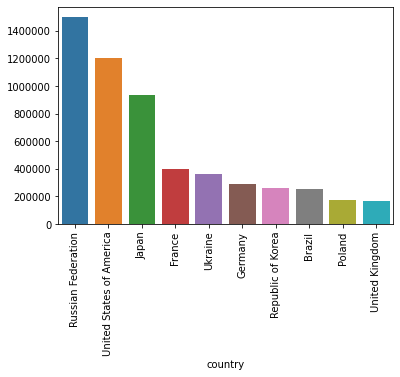

In [17]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
fig, ax = plt.subplots()
sns.barplot(x=top_10_s_country.index,y=top_10_s_country["suicides_no"].values )
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.ticklabel_format(useOffset=False, style='plain', axis="y")
plt.show()

**What was the number of suicides in each year?**

In [18]:
suicides_per_year = df.pivot_table(index= ["year"],
                                  aggfunc={"suicides_no":sum})

suicides_per_year

,suicides_no
year,
1979,92790.0
1980,153400.0
1981,177705.0
1982,182435.0
1983,122166.0
1984,124264.0
1985,197115.0
1986,188684.0
1987,185757.0


**And how do you see its evolution in a graph?**

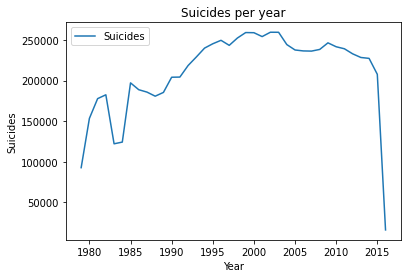

In [19]:
plt.plot(suicides_per_year.index, suicides_per_year["suicides_no"].values, label="Suicides")
plt.title("Suicides per year")
plt.xlabel("Year")
plt.ylabel("Suicides")
plt.legend()
plt.show()

**Over time, do women and men commit suicide in equal numbers?**

In [20]:
s_female = df.query("sex == 'female'").pivot_table(index=["decade"], columns=["sex"],
                                                    aggfunc={"suicides_no":sum})
s_female

,suicides_no
sex,female
decade,
1970,29418.0
1980,454724.0
1990,541879.0
2000,546569.0
2010,321704.0


In [21]:
s_male = df.query("sex == 'male'").pivot_table(index=["decade"], columns=["sex"],
                                                    aggfunc={"suicides_no":sum})
s_male

,suicides_no
sex,male
decade,
1970,63372.0
1980,1242884.0
1990,1802896.0
2000,1923880.0
2010,1071141.0


**Let's compare this data in a graph.**

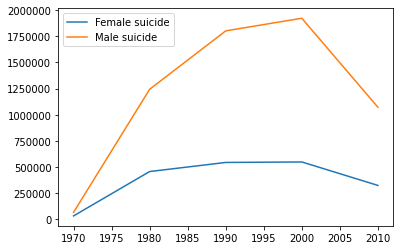

In [22]:
fig, ax = plt.subplots()
plt.plot(s_female.index,s_female["suicides_no"].values, label="Female suicide")
plt.plot(s_male.index, s_male["suicides_no"].values, label="Male suicide")
plt.legend()
ax.ticklabel_format(useOffset=False, style='plain', axis="y")
plt.show()